In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titan = pd.read_csv("train.csv")

In [3]:
titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# # Checking null values

In [5]:
titan.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
titan.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

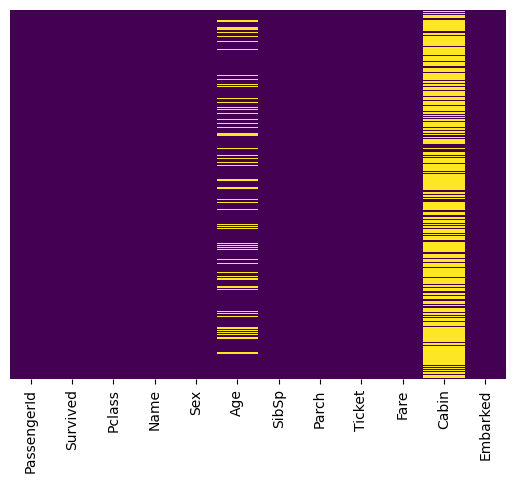

In [7]:
sns.heatmap(titan.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Imputation

In [8]:
#Inputation

def impute_age(cols):
    age = cols[0]
    Pclass = cols[1]
    if pd.isnull(age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return  age

In [9]:
titan["Age"] = titan[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

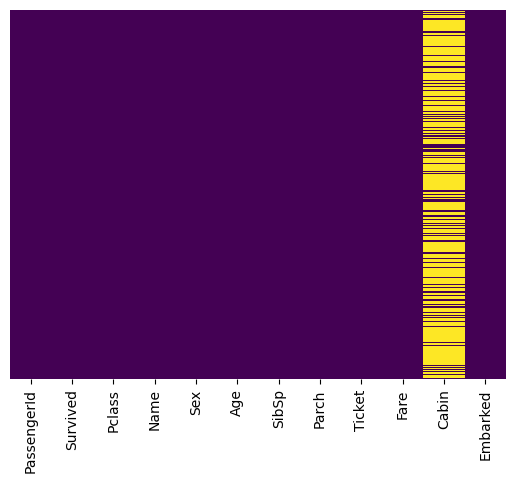

In [10]:
sns.heatmap(titan.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
titan.drop('Cabin',axis=1,inplace=True)
titan.dropna(inplace=True)

<Axes: >

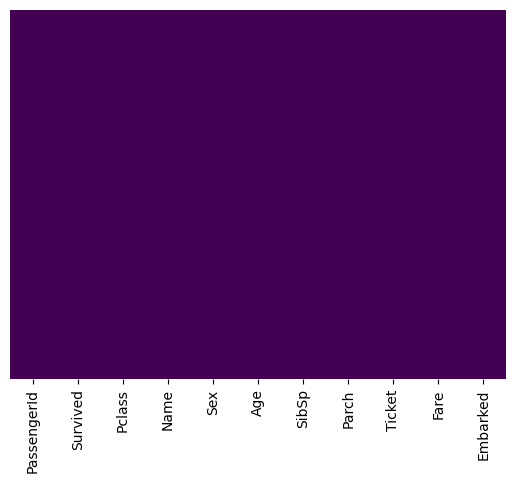

In [12]:
sns.heatmap(titan.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
## Null values are removed

# # EDA

[Text(0, 0, '549'), Text(0, 0, '340')]

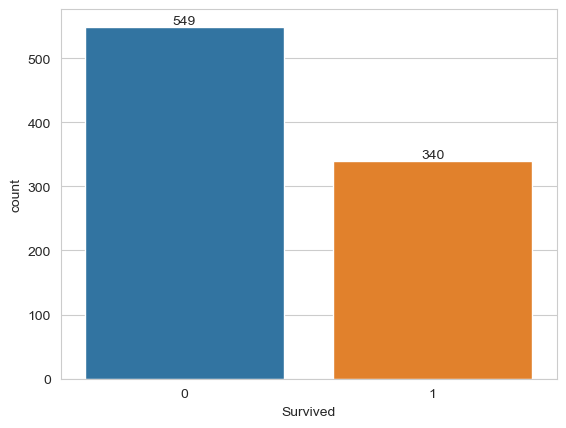

In [14]:
sns.set_style('whitegrid')
ax = sns.countplot(x='Survived',data=titan)
ax.bar_label(ax.containers[0])

In [15]:
## From above chart we have analysed that 549 are those who hadn't survived.

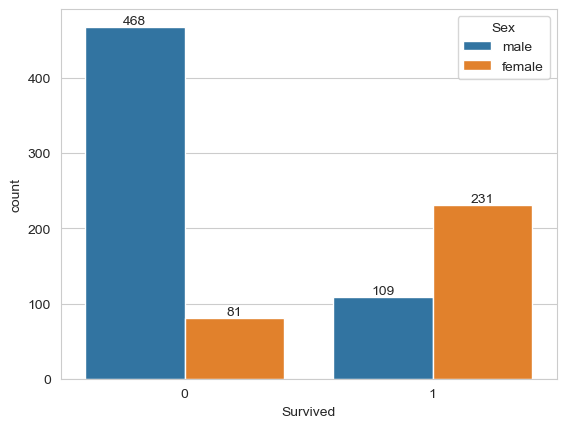

In [16]:
ax = sns.countplot(x='Survived',hue='Sex' ,data=titan)
for bars in ax.containers:
    ax.bar_label(bars)

In [17]:
## The ratio of un-survived males is more than the females but women had survived most than the men.

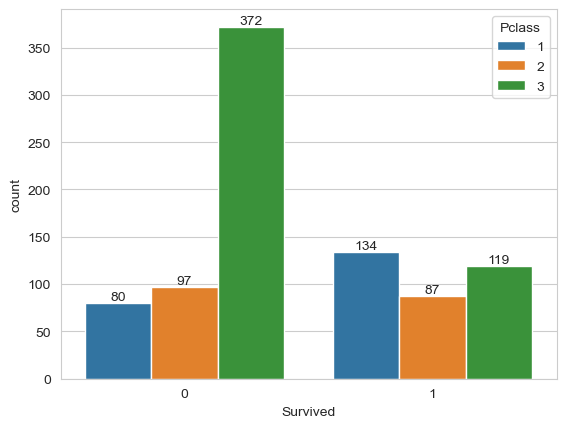

In [18]:
ax = sns.countplot(x='Survived',hue='Pclass' ,data=titan)
for bars in ax.containers:
    ax.bar_label(bars)

In [19]:
## The most un-survived peoples are from class 3.

C:\Users\Zia Saab\AppData\Local\Temp\ipykernel_5684\90199596.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titan['Age'],kde=False,bins=30)


<Axes: xlabel='Age'>

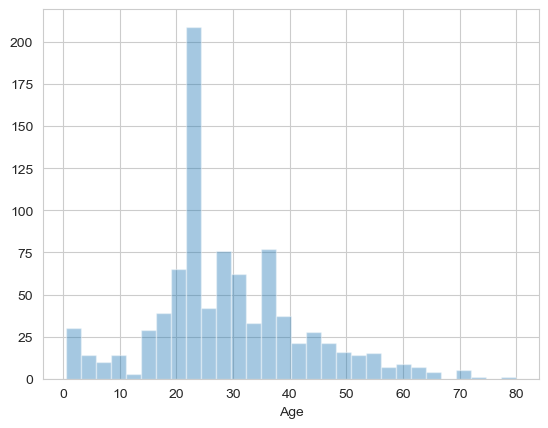

In [20]:
sns.distplot(titan['Age'],kde=False,bins=30)

<Axes: ylabel='Frequency'>

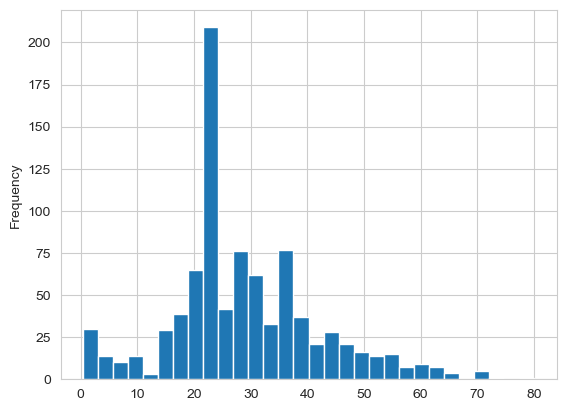

In [21]:
titan['Age'].plot.hist(bins=30)

[Text(0, 0, '606'),
 Text(0, 0, '209'),
 Text(0, 0, '28'),
 Text(0, 0, '16'),
 Text(0, 0, '18'),
 Text(0, 0, '5'),
 Text(0, 0, '7')]

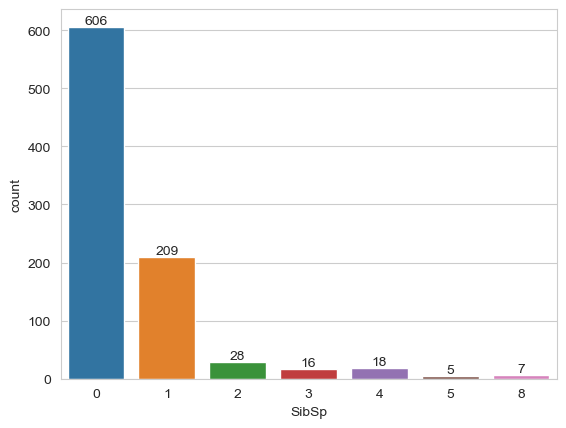

In [22]:
ax = sns.countplot(x='SibSp',data=titan)
ax.bar_label(ax.containers[0])

<Axes: >

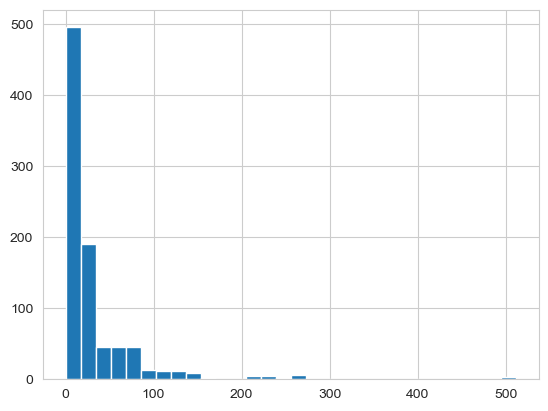

In [23]:
titan['Fare'].hist(bins=30)

<Axes: xlabel='Pclass', ylabel='Age'>

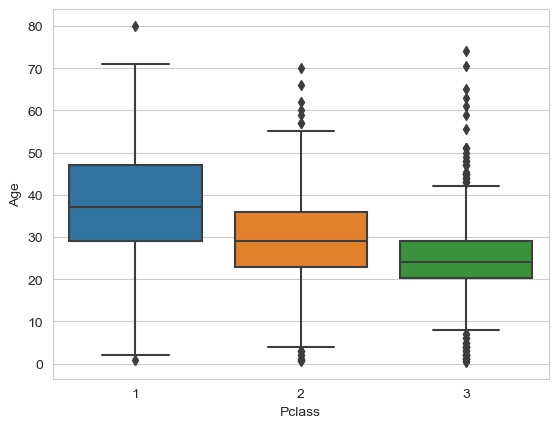

In [24]:
sns.boxplot(x='Pclass',y='Age',data=titan)

In [25]:
titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [26]:
pd.get_dummies(titan['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [27]:
sex = pd.get_dummies(titan['Sex'],drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [28]:
embarked = pd.get_dummies(titan['Embarked'],drop_first=True)
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [29]:
titan = pd.concat([titan,sex,embarked],axis=1)
titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [30]:
titan.drop(['Q','S'],axis=1,inplace=True)
titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [31]:
titan.drop(['PassengerId','Name','Sex','Ticket','Embarked'],inplace=True,axis=1)
titan.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


# # Logistic Regression

In [32]:
X = titan.drop('Survived',axis=1)
y = titan['Survived']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=101)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
logreg = LogisticRegression()

In [37]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [38]:
prediction = logreg.predict(X_test)
prediction

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

# # Classification Report

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.81      0.91      0.85       174
           1       0.84      0.68      0.75       120

    accuracy                           0.82       294
   macro avg       0.82      0.80      0.80       294
weighted avg       0.82      0.82      0.81       294



# # Confusion Matrix

In [41]:
print(confusion_matrix(y_test,prediction))

[[158  16]
 [ 38  82]]


# # Accuracy_rate/ Error_rate

In [42]:
confusion_matrix = [[149,20],[39,87]]
tn, fp = confusion_matrix[0]
fn, tp = confusion_matrix[1]
accuracy = (tp + tn) / (tp + tn + fp + fn)
error_rate = (fp + fn) / (tp + tn + fp + fn)
print(f'Accuracy rate : {accuracy:.2f}')
print(f'Error rate : {error_rate:.2f}')

Accuracy rate : 0.80
Error rate : 0.20


#  Coefficient

In [43]:
logreg.coef_

array([[-1.09375134e+00, -3.97497052e-02, -2.92631840e-01,
        -8.60232606e-02,  2.07515369e-03, -2.55850783e+00]])

# Intercept

In [44]:
logreg.intercept_

array([4.72908299])